In [1]:
# KNN Classification
import pandas as pd, numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
filename = 'C:/Users/Moin Dalvi/Documents/Data Science Material/Data Science/Python/Datasets/pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = pd.read_csv(filename, names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [7]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [9]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

### Grid Search for Algorithm Tuning

In [32]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)

In [33]:
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [12]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =10)
grid.fit(X, Y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71, 73, 75, 77, 79])})

In [13]:
print(grid.best_score_)
print(grid.best_params_)

0.760457963089542
{'n_neighbors': 15}


### Visualizing the CV results

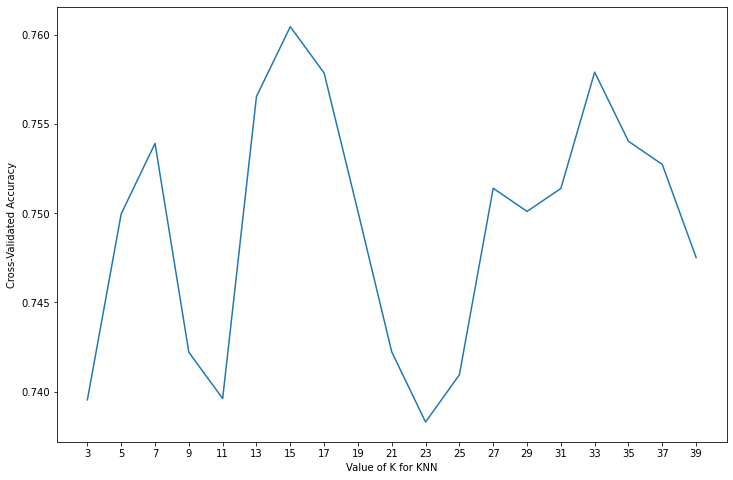

In [45]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
#plt.ylim(0.8,1)
plt.show()

In [17]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head()

,0
14,0.760458
16,0.757861
12,0.756545
6,0.753913
11,0.752614


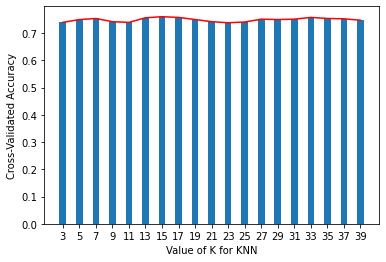

In [47]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 20
k_range = [2*i+1 for i in range(1,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
#plt.ylim(0.8,1)
plt.show()

In [36]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head()

,0
6,0.760458
15,0.757912
7,0.757861
5,0.756545
16,0.754033


In [21]:
num_folds = 10
kfold = KFold(n_splits=10)

In [22]:
model = KNeighborsClassifier(n_neighbors=6)
results = cross_val_score(model, X, Y, cv=kfold)

In [23]:
print(results.mean())

0.7434381408065618
